In [1]:
%reload_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt

In [2]:
train_durs = np.load(
    '/home/stanislavv/data/librimeta/durs/ljspeech_300epochs-qn15x5-eqlen/train.npy',
    allow_pickle=True,
)
len(train_durs)

13036

In [3]:
eval_durs = np.load(
    '/home/stanislavv/data/librimeta/durs/ljspeech_300epochs-qn15x5-eqlen/eval.npy', 
    allow_pickle=True,
)
len(eval_durs)

64

In [4]:
max(sum(b) + sum(d) for b, d in eval_durs)

870

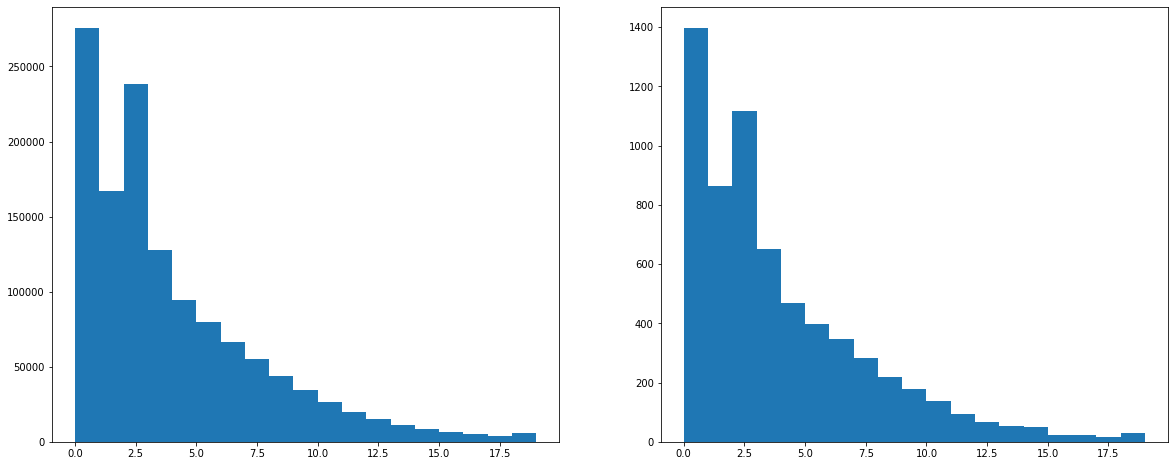

In [36]:
t, e = [], []
for b, _ in train_durs:
    t.extend(b)
for b, _ in eval_durs:
    e.extend(b)

plt.figure(figsize=(20, 8))
plt.subplot(121)
plt.hist(t, bins=range(20));
plt.subplot(122)
plt.hist(e, bins=range(20));

In [3]:
blanks, durs = all_durs[0]
print(*blanks)
print(*durs)

14 2 0 8 4 2 10 1 0 0 20 3 2 8 15 2 2 6 0 20 6 2 9 2 64 1 5 3 9 3 15 3 18 1 5 3 0 7 3 1 6 17 2 9 0 24 5 2 10 2 2 5 8 2 8 0 28 1
1 1 1 2 2 0 1 1 2 3 1 1 1 1 1 1 2 1 2 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1 1 2 1 1 1 2 1 1 2 1 1 1 1 1


In [239]:
class BDAugs:
    @staticmethod
    def shake(b, d, p=0.1):
        b, d, total = b.copy(), d.copy(), sum(b) + sum(d)
        
        def split2(x):
            xl = np.random.binomial(x, p)
            return xl, x - xl
        
        def split3(x):
            xl, xm = split2(x)
            xr, xm = split2(xm)
            return xl, xm, xr

        n, m = len(b), len(d)
        nb = np.zeros_like(b)
        for i in range(len(b)):
            bl, bm, br = split3(b[i])

            nb[i] += bm

            if i > 0:
                d[i - 1] += bl
            else:
                nb[i] += bl

            if i < m:
                d[i] += br
            else:
                nb[i] += br
        
        b = nb
        assert sum(b) + sum(d) == total

        return b, d
    
    @staticmethod
    def zero_out(b, d, p=0.1):
        b, d, total = b.copy(), d.copy(), sum(b) + sum(d)
        
        mask = np.random.binomial(1, size=d.size, p=p).astype(bool)
        b[:-1][mask] += d[mask]
        d[mask] -= d[mask]
        
        assert sum(b) + sum(d) == total

        return b, d

    @staticmethod
    def compose(augs):
        def pipe(b, d, p=0.1):
            for aug in augs:
                b, d = aug(b, d, p=p)
            
            return b, d
        
        return pipe


print(*durs)
_, new_durs = BDAugs.compose([BDAugs.shake, BDAugs.zero_out])(blanks, durs, p=0.2)
print(*new_durs)

1 1 1 2 2 0 1 1 2 3 1 1 1 1 1 1 2 1 2 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1 1 2 1 1 1 2 1 1 2 1 1 1 1 1
4 1 0 4 2 1 4 2 2 6 3 2 6 0 10 0 4 1 5 8 4 1 1 15 0 0 1 3 3 3 4 0 6 1 3 2 3 0 2 2 5 0 2 3 8 0 2 5 0 3 1 0 1 2 4 2 0
